In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets

import numpy as np

from utils import plot_2d, test_model, test_model_with_standard_scaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2>MLP vs Logistic Regression</h2>

<h4>mlp being better than lr</h4>

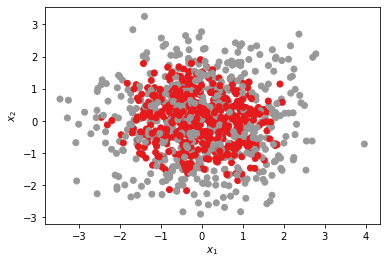

In [7]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

In [8]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 32, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.913
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


In [9]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

AUC score: 0.512
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


<h4>lr being better than mlp</h4>

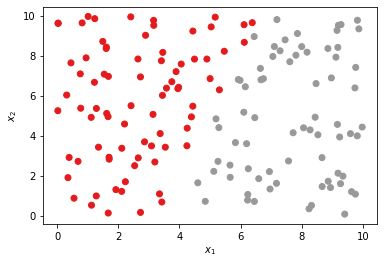

In [10]:
def g_lr():
    def classify(x, y):
        func = 3 * x - 10
        return int(func / y > 1) # 1 or 0 as label

    X = np.random.rand(150, 2) * 10
    y = np.asarray([classify(x, y) for x, y in X])
    return X, y

X, y = g_lr()
plot_2d(X, y)

AUC score: 0.998


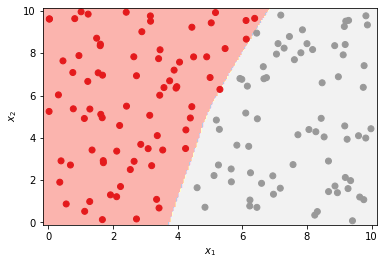

In [11]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.980


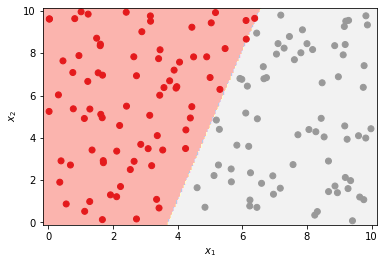

In [12]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

<h2>MLP vs kNN</h2>

<h4>MLP performing better than kNN</h4>

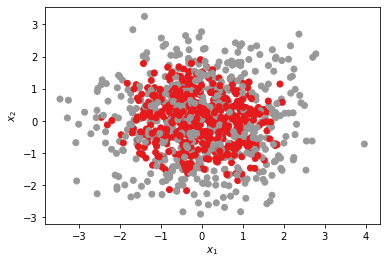

In [13]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

In [14]:
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.934
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

AUC score: 0.697
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


<h4>kNN performing better than MLP</h4>

The idea behind the following dataset was to create a big amount of randomly placed blobs and labeling them with no specific criteria. The result is a dataset that fits kNN's assumptions on data, that the target value is being able to be determined by looking around the data point's neighbors.

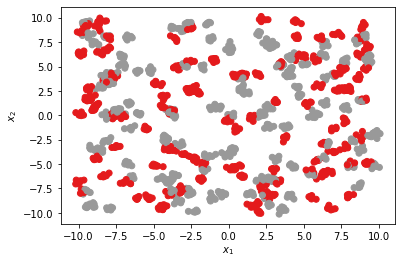

In [16]:
def g_knn():
    X, y = datasets.make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2
    return X, y
    
X, y = g_knn()
plot_2d(X, y)

AUC score: 0.570


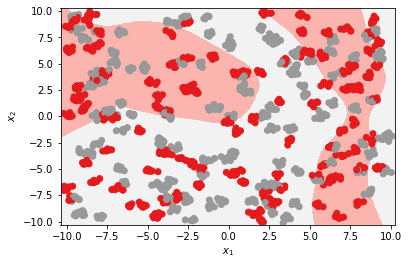

In [17]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 64, 32, 8),
    activation='relu',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.923


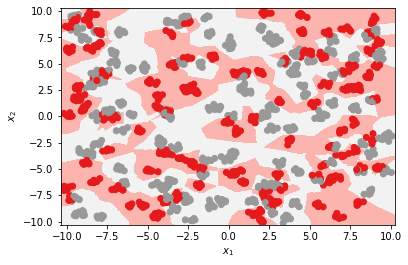

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

<h2>MLP ReLU vs MLP sigmoid</h2>

<h4>ReLU being better than sigmoid</h4>

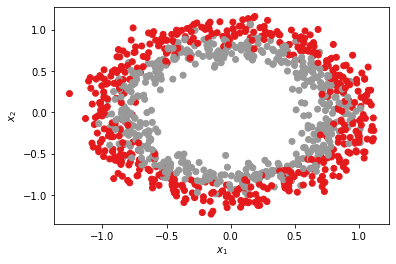

In [8]:
def g_relu():
    X, y = datasets.make_circles(n_samples=1000, noise=0.1, random_state=42)
    return X, y

X, y = g_relu()
plot_2d(X, y)

AUC score: 0.830


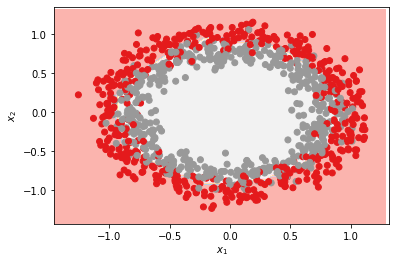

In [16]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 8),
    activation='relu',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.503


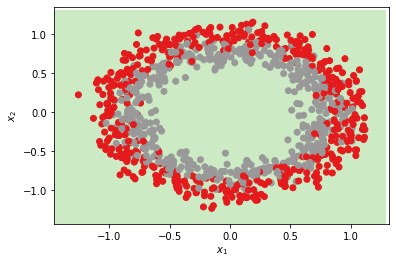

In [17]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 8),
    activation='logistic',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

sigmoid performing better than relu

Reducing the dataset dimension to 2D...


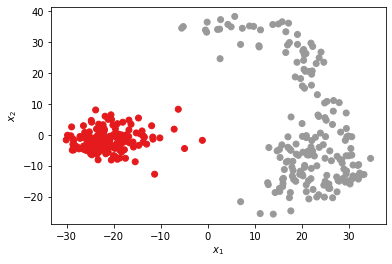

In [5]:
def get_sigmoid():
    return datasets.load_digits(n_class=2, return_X_y=True)

X, y = get_sigmoid()
plot_2d(X, y)

In [6]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128),
    activation='relu',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.995
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


In [7]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128),
    activation='logistic',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

AUC score: 0.993
The classifier boundary can't be plotted because the dataset has more than 2 dimensions
